# serial-comm: comunicación y registro de datos por puerto serial
Autor: Claudio Morales D.<br>
https://github.com/cmoralesd/serial-comm <br>
Otoño 2023<br>
<br>
Código base para establecer comunicación por puerto serial entre un dispositivo Arduino (o similar) y un script de Python, utilizando la librería **pyserial**, controlar entradas y salidas del módulo Arduino mediante valores numéricos intercambiados en formato de texto, registrar datos en un archivo CSV, procesar los datos utilizando las herramientas básicas de la librería **pandas** y obtener gráficos de los datos registrados utilizando **matplotlib.pyplot**.

Para comprender las características generales de la comunicación serial, consulte: https://hetpro-store.com/TUTORIALES/puerto-serial/

Los archivos para programación del módulo Arduino se encuentran en https://github.com/cmoralesd/serial-comm


In [1]:
# librerías requeridas
import serial  # librería pyserial, para comunicación con los puertos serial < pip install pyserial >
import time    # para el manejo de eventos de tiempo, nativa de Python
import pandas as pd  # para el manejo de archivos de datos < pip install pandas >
import matplotlib.pyplot as plt # para realizar gráficos < pip install matplotlib >


# funciones para enviar y recibir mensajes en formato de texto, codificado en UTF-8
# los mensajes utilizan como terminador un caracter de final de línea '\n'
def encode_send(ser, texto):
    enc = f'{texto}\n'.encode('UTF-8')
    ser.write(enc)

def decode_response(ser):
    message_from_serial = ser.readline()
    res = message_from_serial[:-1].decode()
    return res


### 1. Código base en esquema request-response

El esquema de comunicación utilizado es **maestro-esclavo** (master-slave) en modo **request-response** (requerimiento-respuesta): sólo un dispositivo puede iniciar la comunicación enviando un requerimiento y el otro dispositivo responde. 

En este caso, el script de Python siempre inicia la comunicación, con un mensaje de texto que contiene dos valores enteros separados por una coma (,). El dispositivo Arduino recibe el mensaje, lo procesa, y envía una respuesta.

El código utilizado en Arduino es: **serial-comm.ino**

In [2]:
# Esquema básico para request-response
# El código utilizado en Arduino es: serial-comm.ino

# 1. Inicializa el puerto de comunicación y espera a que esté listo
serialport = serial.Serial('COM3', 9600)
time.sleep(0.5)   # tiempo de espera recomendado: 100 ms

# 2. Preparamos el mensaje a ser transmitido
val_0 = 123
val_1 = 456
message_to_serial = str(val_0) + ',' + str(val_1)

# 3. Enviamos al puerto y esperamos la respuesta
encode_send(serialport, message_to_serial)
message_from_serial = decode_response(serialport)

# 4. Procesamos la respuesta
print(f'enviado: {message_to_serial}')
print(f'recibido: {message_from_serial}')

# 5. Cierra el puerto serial
serialport.close()
print('el puerto se ha cerrado correctamente')


enviado: 123,456
recibido: Arduino OK
el puerto se ha cerrado correctamente


### 2. Enviando mensajes en forma cíclica

El código utilizado en Arduino es: **serial-comm.ino**

In [25]:
serialport.close()

In [21]:
time.perf_counter()

2131.3449716

In [3]:
# Esquema básico para comunicarse por puerto serial en forma cíclica
# El código utilizado en Arduino es: serial-comm.ino

# inicializa el puerto de comunicación y espera a que esté listo
serialport = serial.Serial('COM3', 9600)
time.sleep(0.1)   # tiempo de espera recomendado: 100 ms

time_start = time.perf_counter()
time_elapsed = time.perf_counter() - time_start
time_stop = 5. #en segundos

# inicia el ciclo de intercambio de datos


while time_elapsed < time_stop:
    # Preparamos el mensaje a ser transmitido
    val_0 = 0
    val_1 = 0
    message_to_serial = str(val_0) + ',' + str(val_1)

    # enviamos al puerto y esperamos la respuesta
    encode_send(serialport, message_to_serial)
    message_from_serial = decode_response(serialport)

    # procesamos la respuesta
    print(f'enviado: {message_to_serial}')
    print(f'recibido: {message_from_serial}')

    #actualizar la medición de tiempo
    time_elapsed = time.perf_counter() - time_start
    print(f'tiempo: {time_elapsed}')
    time.sleep(0.2) # en segundos

# cierra el puerto serial
serialport.close()
print('el puerto se ha cerrado correctamente')

enviado: 0,0
recibido: Arduino OK
tiempo: 0.5556462999998075
enviado: 0,0
recibido: 512;506
tiempo: 0.7943616999996266
enviado: 0,0
recibido: 512;505
tiempo: 1.0334287999999106
enviado: 0,0
recibido: 512;505
tiempo: 1.2725989999999001
enviado: 0,0
recibido: 512;506
tiempo: 1.5120990999998867
enviado: 0,0
recibido: 512;506
tiempo: 1.7514906999999766
enviado: 0,0
recibido: 511;506
tiempo: 1.9906796000000213
enviado: 0,0
recibido: 512;506
tiempo: 2.229374099999859
enviado: 0,0
recibido: 512;506
tiempo: 2.4686385999998492
enviado: 0,0
recibido: 512;506
tiempo: 2.708339299999807
enviado: 0,0
recibido: 512;506
tiempo: 2.9480013999996117
enviado: 0,0
recibido: 512;506
tiempo: 3.187606599999981
enviado: 0,0
recibido: 512;506
tiempo: 3.426898899999742
enviado: 0,0
recibido: 512;506
tiempo: 3.6657845999998244
enviado: 0,0
recibido: 512;506
tiempo: 3.905595899999753
enviado: 0,0
recibido: 512;506
tiempo: 4.144403799999964
enviado: 0,0
recibido: 512;506
tiempo: 4.3842076999999335
enviado: 0,0
reci

### 2. Controlando pines I/O en el dispositivo Arduino

El código utilizado en Arduino es: **serial-control.ino**

In [35]:
serialport.close()

In [16]:
# Esquema básico para control de pines I/O en modo request-response
# El código utilizado en Arduino es: serial-comm.ino

# 1. Inicializa el puerto de comunicación y espera a que esté listo
serialport = serial.Serial('COM3', 9600)
time.sleep(0.5)   # tiempo de espera recomendado: 100 ms

# 2. Preparamos el mensaje a ser transmitido
led_verde = 0    # 0 = apagado, otro valor = encendido
led_rojo = 128     # nivel PWM entre 0 y 255
message_to_serial = str(led_verde) + ',' + str(led_rojo)

# 3. Enviamos al puerto y esperamos la respuesta
encode_send(serialport, message_to_serial)
message_from_serial = decode_response(serialport) #Primer mensaje es descartado (debido a que es un str/texto)

encode_send(serialport, message_to_serial)
message_from_serial = decode_response(serialport)


# 4. Procesamos la respuesta
print(f'enviado: {message_to_serial}')

data = message_from_serial.split(';')
val_x = int(data[0])
val_y = int(data[1])
print(f'val_x = {val_x}')
print(f'val_y = {val_y}')

# 5. Cierra el puerto serial

serialport.close()
print('el puerto se ha cerrado correctamente')



enviado: 0,128
val_x = 512
val_y = 506
el puerto se ha cerrado correctamente


### 4. Registrando datos recibidos desde el puerto serial

El código utilizado en Arduino es: **serial-control.ino**

In [27]:
filename = 'dataset' + time.strftime('<%d-%m-%y-%H:%M:%S>') + '.csv'
filename

'dataset<02-06-23-20:04:22>.csv'

In [7]:
serialport.close()

In [9]:
# Registro de transacciones vía puerto serial
# El código utilizado en Arduino es: serial-comm.ino

# 1. Inicializa el puerto de comunicaciones
serialport = serial.Serial('COM3', 9600)
time.sleep(0.1) 
# 2. Inicializa el archivo de registro de datos
filename = 'dataset-' + time.strftime('%d-%m-%y-%H%M%S') + '.csv'
with open(filename,'w') as file:
    file.write('tiempo,led_verde,led_rojo,val_x,val_y\n')

# 3. Registra las transacciones durante un periodo de tiempo especificado
time_start = time.perf_counter()
time_elapsed = time.perf_counter() - time_start
time_stop = 5. #en segundos

while time_elapsed < time_stop:
    led_verde = 1    # 0 = apagado, otro valor = encendido
    led_rojo = time_elapsed/time_stop + 255 # nivel PWM entre 0 y 255
    message_to_serial = str(led_verde) + ',' + str(led_rojo)

    # 3. Enviamos al puerto y esperamos la respuesta
    encode_send(serialport, message_to_serial)
    message_from_serial = decode_response(serialport)
    encode_send(serialport, message_to_serial)
    message_from_serial = decode_response(serialport)
    
    data = message_from_serial.split(';')
    val_x = int(data[0])
    val_y = int(data[1])
    print(f'enviado: {message_to_serial}')
    print(f'recibido: {message_from_serial}')

    with open(filename,'a')as file:
        file.write(str(time_elapsed) + ','+ str(led_verde) + ',' +str(led_rojo) + ',' +str(val_x) + ','+ str(val_y) + '\n')

    time_elapsed = time.perf_counter() - time_start
# 4. Cierra el puerto de comunicaciones
serialport.close()
print('el puerto se ha cerrado correctamente')

enviado: 1,255.0000107599999
recibido: 512;1023
enviado: 1,255.12230402000006
recibido: 0;506
enviado: 1,255.14414259999995
recibido: 969;0
enviado: 1,255.1656232199999
recibido: 1023;1023
enviado: 1,255.1885081999999
recibido: 0;1023
enviado: 1,255.21100652000004
recibido: 0;0
enviado: 1,255.23254183999998
recibido: 1023;218
enviado: 1,255.25504261999995
recibido: 1023;1023
enviado: 1,255.27871625999995
recibido: 0;511
enviado: 1,255.30121710000003
recibido: 377;0
enviado: 1,255.32263344000003
recibido: 1023;817
enviado: 1,255.34548737999995
recibido: 512;1023
enviado: 1,255.3688135799999
recibido: 0;506
enviado: 1,255.39053924
recibido: 512;0
enviado: 1,255.4093555199999
recibido: 1023;506
enviado: 1,255.43170584
recibido: 1023;1023
enviado: 1,255.45293579999998
recibido: 0;506
enviado: 1,255.4749224199999
recibido: 512;0
enviado: 1,255.49594763999994
recibido: 1023;1023
enviado: 1,255.51888123999998
recibido: 512;1023
enviado: 1,255.54241072000005
recibido: 0;0
enviado: 1,255.563905

In [33]:
filename = 'dataset' + time.strftime('%d-%m-%y-%H:%M:%S') + '.csv'
filename

'dataset02-06-23-20:06:03.csv'

In [10]:
df = pd.read_csv(filename)
df

,tiempo,led_verde,led_rojo,val_x,val_y
0,0.000054,1,255.000011,512,1023
1,0.611520,1,255.122304,0,506
2,0.720713,1,255.144143,969,0
3,0.828116,1,255.165623,1023,1023
4,0.942541,1,255.188508,0,1023
5,1.055033,1,255.211007,0,0
6,1.162709,1,255.232542,1023,218
7,1.275213,1,255.255043,1023,1023
8,1.393581,1,255.278716,0,511
9,1.506086,1,255.301217,377,0


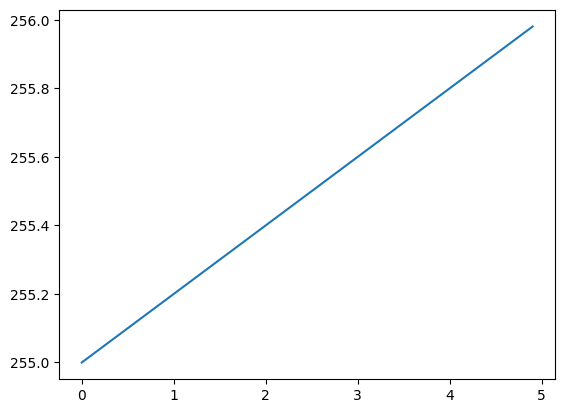

In [11]:
x = df['tiempo'].tolist()
y=df['led_rojo'].tolist()

ax = plt.figure().add_subplot()
ax.plot(x,y)
plt.show()